In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import unidecode
import warnings

In [2]:
%matplotlib inline

sns.set_style('darkgrid')
# sns.set_palette('Set2')

plt.rcParams['figure.figsize'] = (10, 6)

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../../data/raw/bogota_raw.csv')
df.head()

,precio,area_m2,habitaciones,baños,estrato,barrio,antiguead,administracion,parqueadero,piso,...,vista_panoramica,vista_exterior,picina,terraza,balcon,area_terraza_balcon_m2,descripcion,link,query,date
0,1290000000,170.00,4,3,6,Santa Barbara Usaquen,Más de 20 años,1490000.0,3.0,1,...,0,0,1,1,0,1.0,Amplio y remodelado apartamento .. excelente s...,https://www.metrocuadrado.com/inmueble/venta-a...,usaquen,Sun Apr 2 22:24:08 2023
1,450000000,89.37,3,2,4,Cedritos Usaquen,Entre 10 y 20 años,301000.0,1.0,2,...,0,0,0,0,0,NaN,Excelente apartamento ubicado en segundo piso ...,https://www.metrocuadrado.com/inmueble/venta-a...,usaquen,Sun Apr 2 22:24:18 2023
2,215000000,46.54,1,1,4,Cedritos,Más de 20 años,357000.0,1.0,1,...,0,0,0,0,0,NaN,MARIA HERRERA le ofrece Amplio e iluminado apa...,https://www.metrocuadrado.com/inmueble/venta-a...,usaquen,Sun Apr 2 22:24:25 2023
3,890000000,146.00,3,4,5,La Calleja Usaquen,Entre 10 y 20 años,760000.0,3.0,2,...,1,0,0,0,1,20.0,Venta apartamento en La Calleja Baja. Exterior...,https://www.metrocuadrado.com/inmueble/venta-a...,usaquen,Sun Apr 2 22:24:32 2023
4,930000000,189.00,5,4,3,Usaquen,Más de 20 años,1120000.0,3.0,9,...,1,0,0,1,0,NaN,SE VENDE APARTAMENTO Tiene dos apartamentos Un...,https://www.metrocuadrado.com/inmueble/venta-a...,usaquen,Sun Apr 2 22:24:39 2023


In [4]:
df.columns

Index(['precio', 'area_m2', 'habitaciones', 'baños', 'estrato', 'barrio',
       'antiguead', 'administracion', 'parqueadero', 'piso', 'codigo',
       'equipado', 'sauna', 'jacuzzi', 'calefaccion', 'porteria',
       'vista_panoramica', 'vista_exterior', 'picina', 'terraza', 'balcon',
       'area_terraza_balcon_m2', 'descripcion', 'link', 'query', 'date'],
      dtype='object')

## Normalizar los datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   precio                  23856 non-null  int64  
 1   area_m2                 23856 non-null  float64
 2   habitaciones            23856 non-null  int64  
 3   baños                   23856 non-null  int64  
 4   estrato                 23856 non-null  object 
 5   barrio                  23766 non-null  object 
 6   antiguead               23794 non-null  object 
 7   administracion          21320 non-null  float64
 8   parqueadero             20590 non-null  float64
 9   piso                    14370 non-null  object 
 10  codigo                  23796 non-null  object 
 11  equipado                23856 non-null  int64  
 12  sauna                   23856 non-null  int64  
 13  jacuzzi                 23856 non-null  int64  
 14  calefaccion             23856 non-null

In [6]:
df.date = pd.to_datetime(df.date)
df.date.info()

<class 'pandas.core.series.Series'>
RangeIndex: 23856 entries, 0 to 23855
Series name: date
Non-Null Count  Dtype         
--------------  -----         
23856 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 186.5 KB


### Barrio

In [7]:
df.barrio = df.barrio.str.upper()
df.barrio.value_counts()

LOS ROSALES                       698
CHAPINERO ALTO                    684
CEDRITOS                          624
USAQUEN                           612
SANTA BARBARA                     491
                                 ... 
ENTRE RIOS ENGATIVÁ                 1
SANTA ROSITA QUIRIGUA ENGATIVÁ      1
ALAMOS LOS ANGELES ENGATIVÁ         1
SAN JOSE DE LA GRANJA ENGATIVÁ      1
NORTE CHICO NAVARRA                 1
Name: barrio, Length: 2199, dtype: int64

### Estratos

In [8]:
estratos = df.estrato.unique().tolist()
estratos.sort()
estratos = estratos[1:7]
estratos

['1', '2', '3', '4', '5', '6']

In [9]:
# Cambiar los estratos que no son numéricos a NaN
df.estrato = df.estrato.apply(lambda x: np.nan if x not in estratos else x)
df.estrato.value_counts()

6    8947
4    5872
5    4373
3    3411
2    1065
1      97
Name: estrato, dtype: int64

### Piso

In [10]:
df.piso.unique()

array(['1', '2', '9', '4', '5', '8', '3', '7', '0', '6', nan, 'o', 'a'],
      dtype=object)

In [11]:
df.piso[df.piso == 'o'] = np.nan
df.piso[df.piso == 'a'] = np.nan

In [12]:
df.piso.unique()

array(['1', '2', '9', '4', '5', '8', '3', '7', '0', '6', nan],
      dtype=object)

In [13]:
df.antiguead.unique()

array(['Más de 20 años', 'Entre 10 y 20 años', 'Remodelado',
       'Entre 5 y 10 años', 'Entre 0 y 5 años', nan], dtype=object)

### Barrio

In [14]:
def text_normalize(text):
    try:
        return unidecode.unidecode(text).upper()
    except:
        return np.nan

In [15]:
df.barrio = df.barrio.apply(lambda x: text_normalize(x))
df.barrio.value_counts()

LOS ROSALES                       698
CHAPINERO ALTO                    684
USAQUEN                           633
CEDRITOS                          624
SANTA BARBARA                     519
                                 ... 
SANTA MARIA DE LAGO ENGATIVA        1
EL MORTINO ENGATIVA                 1
VILLAS DE GRANADA MONTECARLO 2      1
BOCHICA II ENGATIVA                 1
NORTE CHICO NAVARRA                 1
Name: barrio, Length: 2125, dtype: int64

## Limpiar y eliminar datos

In [16]:
df.columns

Index(['precio', 'area_m2', 'habitaciones', 'baños', 'estrato', 'barrio',
       'antiguead', 'administracion', 'parqueadero', 'piso', 'codigo',
       'equipado', 'sauna', 'jacuzzi', 'calefaccion', 'porteria',
       'vista_panoramica', 'vista_exterior', 'picina', 'terraza', 'balcon',
       'area_terraza_balcon_m2', 'descripcion', 'link', 'query', 'date'],
      dtype='object')

In [17]:
df.shape

(23856, 26)

In [18]:
df.duplicated(subset=['codigo']).sum()

7324

In [19]:
df.drop_duplicates(subset=['codigo'], inplace=True)
df.shape

(16532, 26)

In [20]:
# Eliminar columnas que no son necesarias
del df['date']
del df['link']

In [22]:
df.isna().sum()

precio                        0
area_m2                       0
habitaciones                  0
baños                         0
estrato                      26
barrio                       22
antiguead                     3
administracion             1859
parqueadero                2421
piso                       7345
codigo                        1
equipado                      0
sauna                         0
jacuzzi                       0
calefaccion                   0
porteria                      0
vista_panoramica              0
vista_exterior                0
picina                        0
terraza                       0
balcon                        0
area_terraza_balcon_m2    12608
descripcion                   0
query                         0
dtype: int64

In [23]:
df.dropna(subset=['codigo'], inplace=True)

<AxesSubplot: >

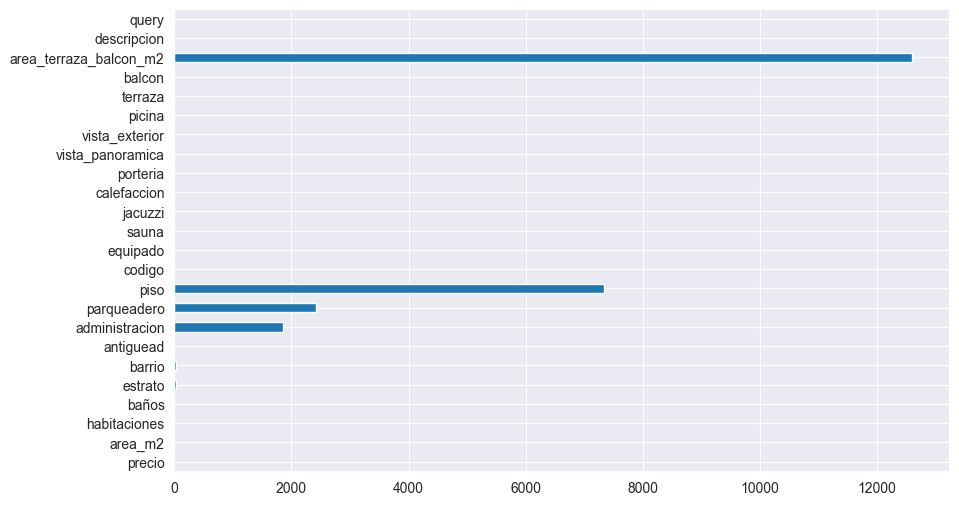

In [24]:
df.isna().sum().plot(kind='barh')

In [25]:
df.area_terraza_balcon_m2.value_counts()

1.00      1244
2.00       277
8.00       270
4.00       233
5.00       222
          ... 
5.20         1
3.70         1
86.00        1
3.14         1
116.00       1
Name: area_terraza_balcon_m2, Length: 214, dtype: int64

In [26]:
df.area_terraza_balcon_m2.describe()


count      3924.000000
mean         40.972806
std        1596.446899
min           1.000000
25%           1.000000
50%           4.000000
75%          12.000000
max      100000.000000
Name: area_terraza_balcon_m2, dtype: float64

In [27]:
df.parqueadero.fillna(0, inplace=True)
df.parqueadero = df.parqueadero.astype(int)
df.parqueadero.unique()

array([3, 1, 2, 0, 4])

In [28]:
# si balcon es 0 y terraza es 0, entonces area_terraza_balcon_m2 es 0
df.area_terraza_balcon_m2[(df.balcon == 0) & (df.terraza == 0)] = 0

In [29]:
del df['piso']

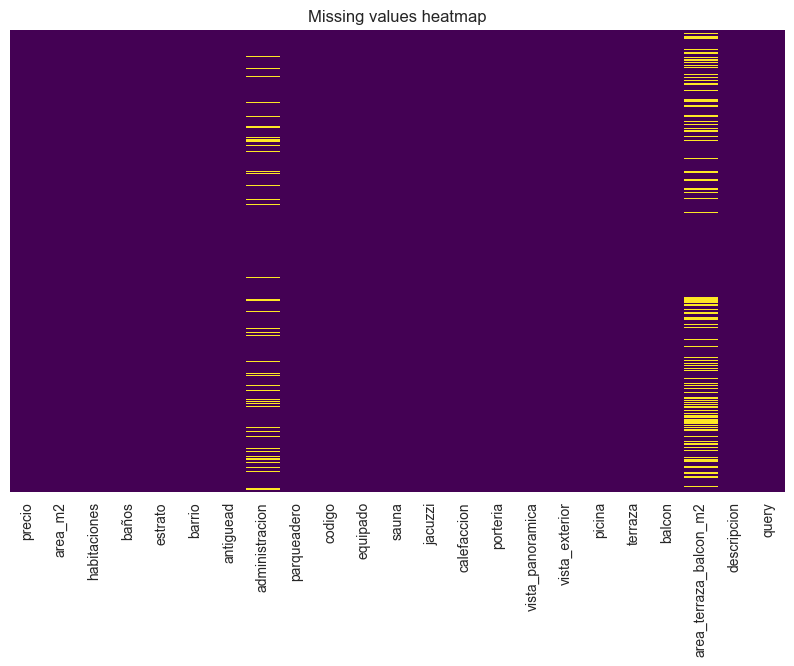

In [30]:
sns.heatmap(
    df.isna(),
    cbar=False,
    yticklabels=False,
    cmap='viridis'
)

plt.title('Missing values heatmap')
plt.show()

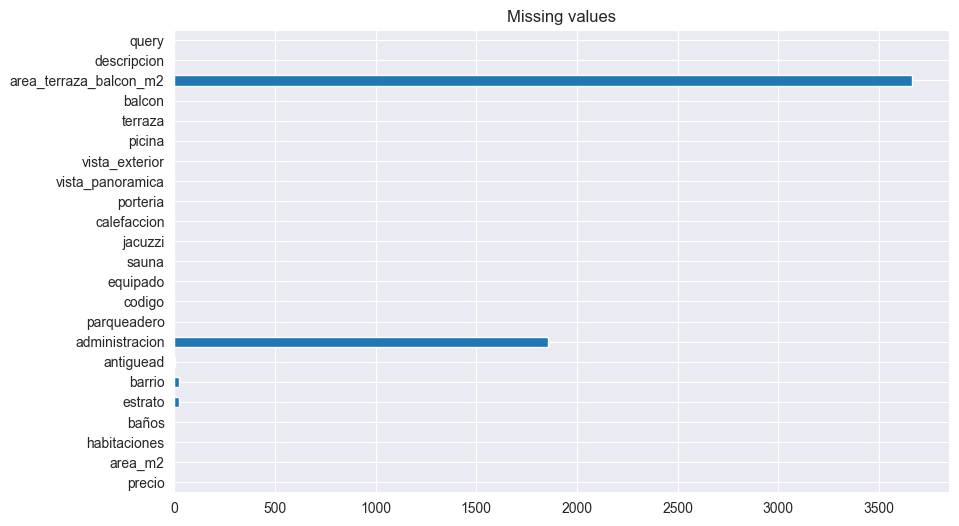

In [31]:
df.isna().sum().plot(kind='barh')

plt.title('Missing values')
plt.show()

In [32]:
df.isna().sum()

precio                       0
area_m2                      0
habitaciones                 0
baños                        0
estrato                     25
barrio                      21
antiguead                    2
administracion            1858
parqueadero                  0
codigo                       0
equipado                     0
sauna                        0
jacuzzi                      0
calefaccion                  0
porteria                     0
vista_panoramica             0
vista_exterior               0
picina                       0
terraza                      0
balcon                       0
area_terraza_balcon_m2    3666
descripcion                  0
query                        0
dtype: int64

In [33]:
df.barrio.isna().sum()

21

In [34]:
barrios = df.barrio.unique()
barrios = barrios.tolist()
barrios.remove(np.nan)
len(barrios)

2125

In [35]:
barrios_na = df[df.barrio.isna()]
barrios_na.head(3)

,precio,area_m2,habitaciones,baños,estrato,barrio,antiguead,administracion,parqueadero,codigo,...,calefaccion,porteria,vista_panoramica,vista_exterior,picina,terraza,balcon,area_terraza_balcon_m2,descripcion,query
10390,4550000000,320.0,2,3,6,NaN,Entre 5 y 10 años,NaN,4,17-M4173473,...,0,0,1,0,1,1,0,1.0,Grandioso apartamento en cerros de los alpes 3...,kennedy
10397,5000000000,307.0,3,4,6,NaN,Entre 0 y 5 años,NaN,4,17-M3975700,...,0,0,1,0,1,1,0,1.0,Espectacular apartamento en cerros de los alpe...,kennedy
10411,4550000000,320.0,2,3,6,NaN,Entre 5 y 10 años,NaN,4,17-M4173124,...,0,0,1,0,1,1,0,1.0,Grandioso apartamento en cerros de los alpes 3...,kennedy


In [36]:
# busca si el barrio está en la descripción
def find_barrio_in_description(x, barrios):
    for barrio in barrios:
        if barrio in str(x.descripcion).upper():
            return barrio
    return np.nan

In [37]:
barrios_na.barrio = barrios_na[barrios_na.barrio.isna()].apply(
    lambda x: find_barrio_in_description(x, barrios), axis=1)

In [38]:
barrios_na.head(3)

,precio,area_m2,habitaciones,baños,estrato,barrio,antiguead,administracion,parqueadero,codigo,...,calefaccion,porteria,vista_panoramica,vista_exterior,picina,terraza,balcon,area_terraza_balcon_m2,descripcion,query
10390,4550000000,320.0,2,3,6,CERROS DE LOS ALPES,Entre 5 y 10 años,NaN,4,17-M4173473,...,0,0,1,0,1,1,0,1.0,Grandioso apartamento en cerros de los alpes 3...,kennedy
10397,5000000000,307.0,3,4,6,CERROS DE LOS ALPES,Entre 0 y 5 años,NaN,4,17-M3975700,...,0,0,1,0,1,1,0,1.0,Espectacular apartamento en cerros de los alpe...,kennedy
10411,4550000000,320.0,2,3,6,CERROS DE LOS ALPES,Entre 5 y 10 años,NaN,4,17-M4173124,...,0,0,1,0,1,1,0,1.0,Grandioso apartamento en cerros de los alpes 3...,kennedy


In [39]:
df[df.barrio.isna()] = barrios_na
df.barrio.isna().sum()

7

In [40]:
df.columns

Index(['precio', 'area_m2', 'habitaciones', 'baños', 'estrato', 'barrio',
       'antiguead', 'administracion', 'parqueadero', 'codigo', 'equipado',
       'sauna', 'jacuzzi', 'calefaccion', 'porteria', 'vista_panoramica',
       'vista_exterior', 'picina', 'terraza', 'balcon',
       'area_terraza_balcon_m2', 'descripcion', 'query'],
      dtype='object')

### AGREGANDO LOCALIDAD

In [41]:
df.barrio.value_counts()

CHAPINERO ALTO                 572
LOS ROSALES                    499
CEDRITOS                       445
USAQUEN                        444
CHAPINERO                      352
                              ... 
ATICOS DE LA COLINA              1
BOSQUE VERDE CERROS DE SUBA      1
COLINA GILMAR                    1
BELALCAZAR NORTE                 1
NORTE CHICO NAVARRA              1
Name: barrio, Length: 2125, dtype: int64

In [42]:
df.drop(df[df.barrio == 'SOACHA'].index, inplace=True)
df.drop(df[df.barrio == 'HOGARES SOACHA'].index, inplace=True)
df.drop(df[df.barrio == 'SANTA CECILIA'].index, inplace=True)
df.drop(df[df.barrio == 'CAMPO VERDE'].index, inplace=True) # ELIMINADOS DEL WEB SITE
df.drop(df[df.barrio == 'LA CALERA'].index, inplace=True)
df.drop(df[df.barrio == 'CHIA'].index, inplace=True)
df.drop(df[df.barrio == 'CHIA VIA COTA'].index, inplace=True)
df.drop(df[df.codigo == '800-M2796716'].index, inplace=True)
df.drop(df[df.codigo == '10858-M4162937'].index, inplace=True)
df.drop(df[df.codigo == '10858-M4163382'].index, inplace=True)
df.drop(df[df.codigo == '10858-M4163383'].index, inplace=True)
df.drop(df[df.codigo == '10858-M4173603'].index, inplace=True)


In [43]:
from utils.bogota_utils import normalize_barrio, assing_localidad, change_barrio

change_barrio(df)
df.barrio = df.barrio.apply(lambda x: normalize_barrio(x))
df['localidad'] = df.barrio.apply(lambda x: assing_localidad(x))


In [44]:
df.localidad[(df.barrio == 'LAS MARGARITAS') & (df.estrato == '2')] = 'KENNEDY'
df.localidad[(df.barrio == 'LAS MARGARITAS') & (df.estrato == '4')] = 'USAQUEN'
df.localidad[(df.barrio == 'CENTRO CANDELARIA') & (df['query'] == 'la-candelaria')] = 'LA CANDELARIA'
df.localidad[(df.barrio == 'CENTRO CANDELARIA') & (df['query'] == 'kennedy')] = 'SANTA FE'
df.localidad[(df.barrio == 'NORTE') & (df['query'] == 'chapinero')] = 'CHAPINERO'
df.localidad[(df.barrio == 'NORTE') & (df['query'] == 'usaquen')] = 'USAQUEN'
df.localidad[df.barrio == 'UNIVERSIDAD NACIONAL'] = 'CHAPINERO'


In [45]:
df.drop(df[df.localidad == 'OTRO'].index, inplace=True)

In [46]:
df.localidad.value_counts()

CHAPINERO             5521
USAQUEN               5040
SUBA                  2656
TEUSAQUILLO            772
FONTIBON               429
SANTA FE               391
KENNEDY                331
ENGATIVA               303
BOSA                   193
BARRIOS UNIDOS         161
SAN CRISTOBAL          147
USME                   118
CIUDAD BOLIVAR          74
PUENTE ARANDA           71
LA CANDELARIA           61
RAFAEL URIBE URIBE      56
MARTIRES                48
TUNJUELITO              34
ANTONIO NARIÑO          29
Name: localidad, dtype: int64

## separar descripción y guardar en csv

In [47]:
del df['query']

In [48]:
df.columns

Index(['precio', 'area_m2', 'habitaciones', 'baños', 'estrato', 'barrio',
       'antiguead', 'administracion', 'parqueadero', 'codigo', 'equipado',
       'sauna', 'jacuzzi', 'calefaccion', 'porteria', 'vista_panoramica',
       'vista_exterior', 'picina', 'terraza', 'balcon',
       'area_terraza_balcon_m2', 'descripcion', 'localidad'],
      dtype='object')

In [50]:
df_descripcion = df[['codigo', 'descripcion']]
df_descripcion.head(3)

,codigo,descripcion
0,14876-M4050776,Amplio y remodelado apartamento .. excelente s...
1,258-M3849369,Excelente apartamento ubicado en segundo piso ...
2,13436-M4154580,MARIA HERRERA le ofrece Amplio e iluminado apa...


In [51]:
df_descripcion.to_csv('../../data/bogota_descripcion.csv', index=False)

In [52]:
del df['descripcion']

In [54]:
df.columns

Index(['precio', 'area_m2', 'habitaciones', 'baños', 'estrato', 'barrio',
       'antiguead', 'administracion', 'parqueadero', 'codigo', 'equipado',
       'sauna', 'jacuzzi', 'calefaccion', 'porteria', 'vista_panoramica',
       'vista_exterior', 'picina', 'terraza', 'balcon',
       'area_terraza_balcon_m2', 'localidad'],
      dtype='object')

In [53]:
df.shape

(16464, 22)

In [55]:
df.to_csv('../../data/bogota.csv', index=False)